# Clean dataset and save to other folders

Split into the temp and prcp features

In [3]:
import os
import sys
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [4]:

for file in tqdm(os.listdir('data')):
    if file.endswith('.csv'):
        file_path = os.path.join('data', file)
        file_path_temp = os.path.join('data_temp', file)
        file_path_prcp = os.path.join('data_prcp', file) 
        df = pd.read_csv(file_path)
        df_temp = df.drop(['dwpt','rhum','prcp','snow','wdir','wspd','wpgt','pres','tsun','coco'], axis=1)
        df_prcp = df.drop(['dwpt','rhum','temp','snow','wdir','wspd','wpgt','pres','tsun','coco'], axis=1)
        df_prcp['prcp'].fillna(0, inplace=True)
        # Save the cleaned DataFrame back to CSV
        df_temp.to_csv(file_path_temp, index=False)
        df_prcp.to_csv(file_path_prcp, index=False)

100%|██████████| 562/562 [04:00<00:00,  2.34it/s]


# Finding minimum and maximum temperature and precipitation values for a day

In [5]:
for file in tqdm(os.listdir('data_temp')):
    if file.endswith('.csv'):
        file_path_temp = os.path.join('data_temp', file)
        file_path_temp_min = os.path.join('data_temp_min', file)
        file_path_temp_max = os.path.join('data_temp_max', file)

        df_temp = pd.read_csv(file_path_temp)
        df_temp['date'] = pd.to_datetime(df_temp['time']).dt.date
        df_daily_max = df_temp.groupby('date', as_index=False)['temp'].max()
        df_daily_min = df_temp.groupby('date', as_index=False)['temp'].min()
        df_daily_max = df_temp.merge(df_daily_max, on=['date', 'temp'])
        df_daily_min = df_temp.merge(df_daily_min, on=['date', 'temp'])
        df_daily_max = df_daily_max.drop_duplicates(subset=['date'], keep='first')
        df_daily_min = df_daily_min.drop_duplicates(subset=['date'], keep='first')
        df_daily_max = df_daily_max.rename(columns={'temp': 'temp_max'})
        df_daily_min = df_daily_min.rename(columns={'temp': 'temp_min'})
        df_daily_max = df_daily_max[['date', 'temp_max']]
        df_daily_min = df_daily_min[['date', 'temp_min']]
        df_daily_max.to_csv(file_path_temp_max, index=False)
        df_daily_min.to_csv(file_path_temp_min, index=False)


100%|██████████| 562/562 [03:09<00:00,  2.97it/s]


In [6]:
for file in tqdm(os.listdir('data_prcp')):
    if file.endswith('.csv'):
        file_path_summed = os.path.join('data_prcp_summed', file)
        file_path_prcp = os.path.join('data_prcp', file)
        df_prcp = pd.read_csv(file_path_prcp)
        df_prcp['date'] = pd.to_datetime(df_prcp['time']).dt.date
        df_daily_summed = df_prcp.groupby('date', as_index=False)['prcp'].sum()
        df_daily_summed = df_daily_summed.rename(columns={'prcp': 'prcp_summed'})
        df_daily_summed.to_csv(file_path_summed, index=False)

100%|██████████| 562/562 [03:30<00:00,  2.67it/s]


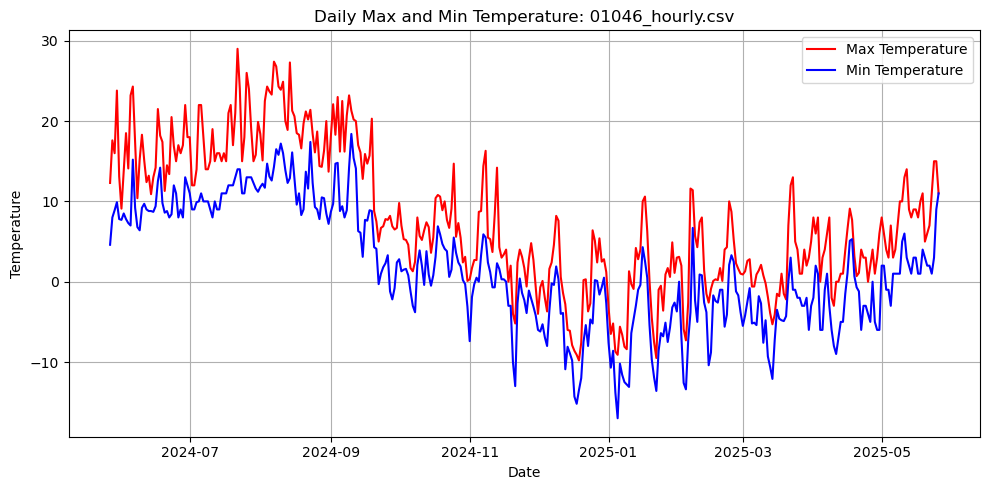

In [12]:
import matplotlib.pyplot as plt

# Example: plot daily max and min temperature from one file
sample_file = os.listdir('data_temp_max')[0]
df_max = pd.read_csv(os.path.join('data_temp_max', sample_file))
df_min = pd.read_csv(os.path.join('data_temp_min', sample_file))
df_max['date'] = pd.to_datetime(df_max['date'])
df_min['date'] = pd.to_datetime(df_min['date'])

plt.figure(figsize=(10, 5))
plt.plot(df_max['date'][-365:], df_max['temp_max'][-365:], color='red', label='Max Temperature')
plt.plot(df_min['date'][-365:], df_min['temp_min'][-365:], color='blue', label='Min Temperature')
plt.title(f"Daily Max and Min Temperature: {sample_file}")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

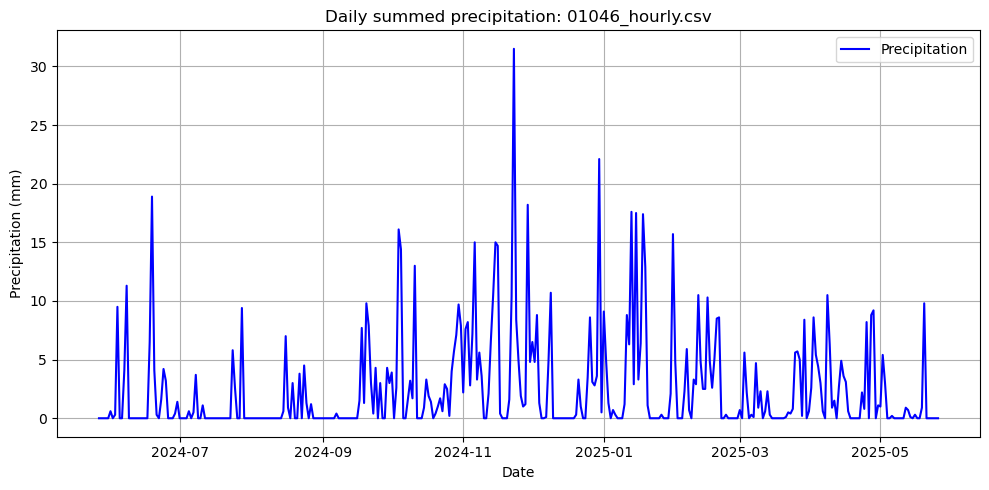

In [15]:
df_prcp = pd.read_csv(os.path.join('data_prcp_summed', sample_file))

df_prcp['date'] = pd.to_datetime(df_prcp['date'])

plt.figure(figsize=(10, 5))
plt.plot(df_prcp['date'][-365:], df_prcp['prcp_summed'][-365:], color='blue', label='Precipitation')
plt.title(f"Daily summed precipitation: {sample_file}")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()